# EDA

In [1]:
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns

In [2]:
plt.style.use(['science','no-latex'])

In [3]:
train_dir = Path("hyperview-representation-learning/data/hyperview/train_data/train_data")
gt_path = Path("representation-hyperview/data/hyperview/train_data/train_gt.csv")
test_dir = Path("hyperview-representation-learning/data/hyperview/test_data")

In [5]:
def get_img_stats(directory: Path) -> pd.DataFrame:
    stats_dict = defaultdict(list)
    filenames = directory.rglob("*.npz")
    image_list = []

    for filename in filenames:
        with np.load(filename) as npz:
            arr = np.ma.MaskedArray(**npz)
            img = arr.data
            stats_dict["max"].append(img.max())
            stats_dict["min"].append(img.min())
            stats_dict["height"].append(img.shape[1])
            stats_dict["width"].append(img.shape[2])
            image_list.append(img)
    
    stats_df = pd.DataFrame.from_dict(stats_dict)
    return stats_df

In [8]:
train_stats = get_img_stats(train_dir)
test_stats = get_img_stats(test_dir)

In [9]:
train_stats.describe()

,max,min,height,width
count,1732.000000,1732.000000,1732.000000,1732.000000
mean,2859.618360,245.549654,58.103349,58.941109
std,1481.411535,146.466742,49.175281,49.462518
min,1077.000000,-13.000000,11.000000,11.000000
25%,1734.000000,138.000000,11.000000,11.000000
50%,2737.500000,242.000000,42.000000,42.000000
75%,3665.250000,362.000000,107.000000,108.000000
max,17488.000000,716.000000,268.000000,284.000000


In [10]:
test_stats.describe()

,max,min,height,width
count,1154.000000,1154.000000,1154.000000,1154.000000
mean,2922.344887,238.348354,57.792894,59.627383
std,1606.327735,147.114596,48.042186,50.343881
min,1064.000000,-32.000000,11.000000,11.000000
25%,1741.000000,113.250000,11.000000,11.000000
50%,2816.500000,234.500000,42.000000,42.000000
75%,3714.750000,360.000000,106.000000,108.000000
max,16886.000000,690.000000,229.000000,273.000000


<Axes: >

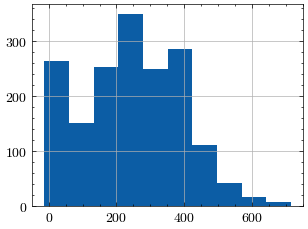

In [11]:
train_stats["min"].hist()

<Axes: >

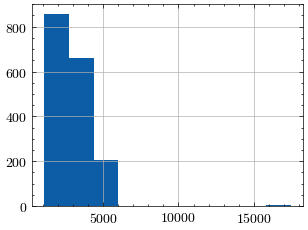

In [12]:
train_stats["max"].hist()

<Axes: >

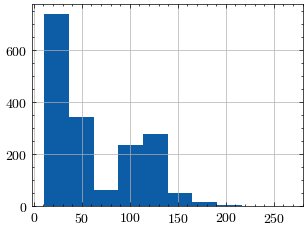

In [13]:
train_stats["height"].hist()  # big difference in sizes

<Axes: >

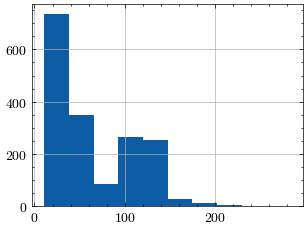

In [14]:
train_stats["width"].hist()

## GT

In [15]:
gt_df = pd.read_csv(gt_path)
params = gt_df.columns.values[1:]
params

array(['P', 'K', 'Mg', 'pH'], dtype=object)

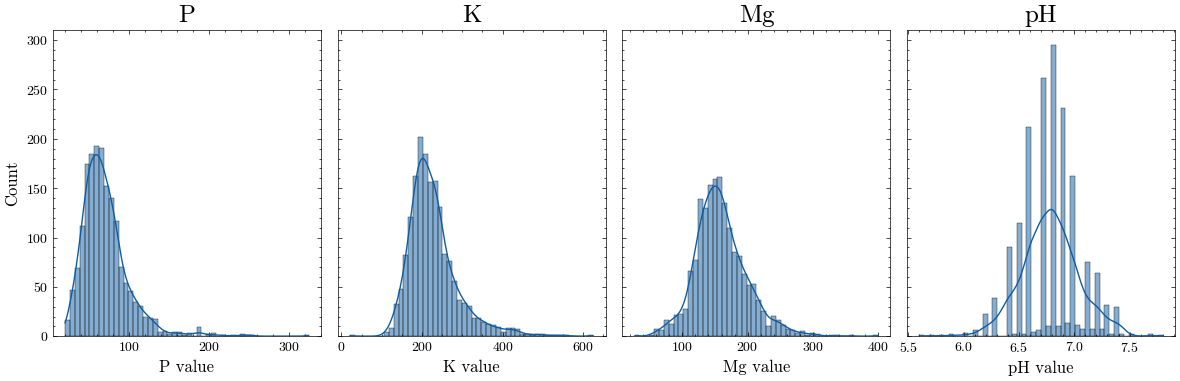

In [ ]:
FIG_SIZE = (12, 4)
FONT_SIZE = 18
NUM_BINS = 50

figs, axs = plt.subplots(1, 4, figsize=FIG_SIZE, sharey=True)

for i, param in enumerate(params):
    sns.histplot(
        gt_df[param],
        bins=NUM_BINS,
        kde=True,
        ax=axs[i]
    )
    axs[i].set_ylabel("Count", fontsize=FONT_SIZE - 6)
    axs[i].set_xlabel(f"{param} value", fontsize=FONT_SIZE - 6)
    axs[i].set_title(param, fontsize=FONT_SIZE)

figs.tight_layout()
plt.show()
figs.savefig("target_dist.png", transparent=True)


In [17]:
avg_edge_train = (train_stats["width"] + train_stats["height"]) / 2
avg_edge_test = (test_stats["width"] + test_stats["height"]) / 2

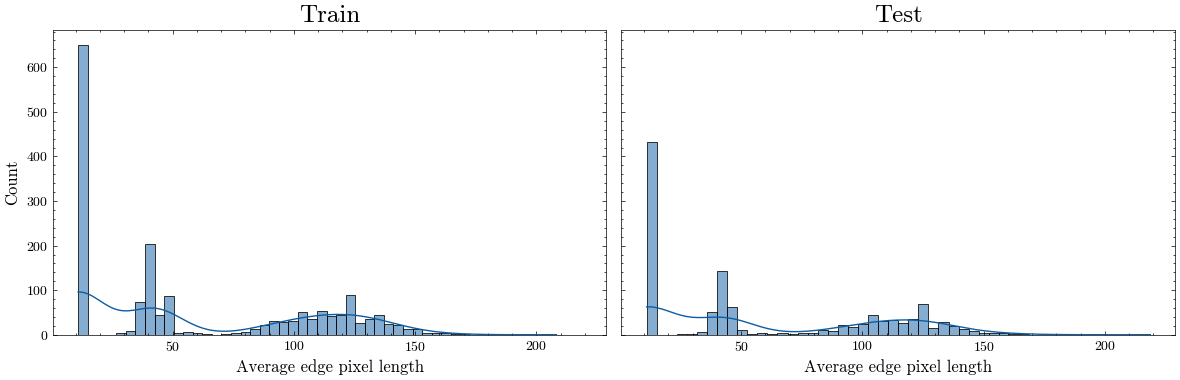

In [ ]:
FIG_SIZE = (12, 4)
FONT_SIZE = 18
NUM_BINS = 50

datasets = [
    (avg_edge_train, "Train"),
    (avg_edge_test, "Test")
]

fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE, sharey=True, sharex=True)

for i, (data, title) in enumerate(datasets):
    sns.histplot(
        data,
        bins=NUM_BINS,
        kde=True,
        ax=axs[i]
    )
    axs[i].set_ylabel("Count", fontsize=FONT_SIZE - 6)
    axs[i].set_xlabel("Average edge pixel length", fontsize=FONT_SIZE - 6)
    axs[i].set_title(title, fontsize=FONT_SIZE)

fig.tight_layout()
fig.savefig("field_distribution.png", transparent=True)